In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
dir_datasets = '/content/drive/MyDrive/DataScience/Data Science Course/0.Datasets/{}'

df_movies = pd.read_csv(dir_datasets.format('IMDb movies.csv'), low_memory=False)
df_ratings = pd.read_csv(dir_datasets.format('IMDb ratings.csv'), low_memory=False)

In [4]:
df_movies = df_movies[['imdb_title_id', 'title', 'year', 'genre', 'country']]
df_ratings = df_ratings[['imdb_title_id', 'total_votes', 'mean_vote']]

In [5]:
df_movies.head()

,imdb_title_id,title,year,genre,country
0,tt0000009,Miss Jerry,1894,Romance,USA
1,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Australia
2,tt0001892,Den sorte drøm,1911,Drama,"Germany, Denmark"
3,tt0002101,Cleopatra,1912,"Drama, History",USA
4,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",Italy


In [6]:
df_ratings.head()

,imdb_title_id,total_votes,mean_vote
0,tt0000009,154,5.9
1,tt0000574,589,6.3
2,tt0001892,188,6.0
3,tt0002101,446,5.3
4,tt0002130,2237,6.9


# **FULL JOIN AND EXCLUSIVE FULL JOIN**

### **FULL JOIN**

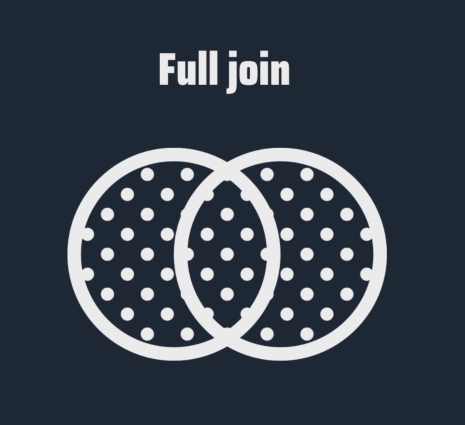

In [7]:
df_full_join = df_movies.merge(df_ratings, on='imdb_title_id', how='outer')
df_full_join

,imdb_title_id,title,year,genre,country,total_votes,mean_vote
0,tt0000009,Miss Jerry,1894,Romance,USA,154,5.9
1,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Australia,589,6.3
2,tt0001892,Den sorte drøm,1911,Drama,"Germany, Denmark",188,6.0
3,tt0002101,Cleopatra,1912,"Drama, History",USA,446,5.3
4,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",Italy,2237,6.9
...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,2020,Comedy,"France, Belgium",398,5.5
85851,tt9911196,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",Netherlands,724,7.9
85852,tt9911774,Padmavyuhathile Abhimanyu,2019,Drama,India,265,7.8
85853,tt9914286,Sokagin Çocuklari,2019,"Drama, Family",Turkey,194,9.4


### **FULL JOIN EXCLUSIVE**

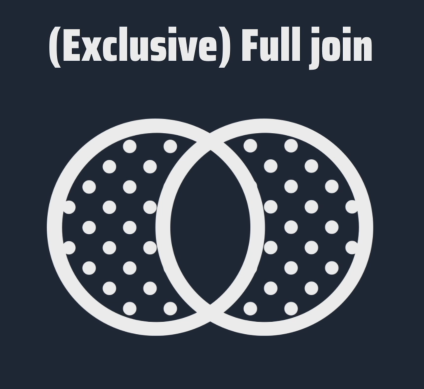

In [8]:
df_full_join_exclusive = df_movies.merge(df_ratings, on='imdb_title_id', how='outer', indicator=True)
df_full_join_exclusive

,imdb_title_id,title,year,genre,country,total_votes,mean_vote,_merge
0,tt0000009,Miss Jerry,1894,Romance,USA,154,5.9,both
1,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Australia,589,6.3,both
2,tt0001892,Den sorte drøm,1911,Drama,"Germany, Denmark",188,6.0,both
3,tt0002101,Cleopatra,1912,"Drama, History",USA,446,5.3,both
4,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",Italy,2237,6.9,both
...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,2020,Comedy,"France, Belgium",398,5.5,both
85851,tt9911196,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",Netherlands,724,7.9,both
85852,tt9911774,Padmavyuhathile Abhimanyu,2019,Drama,India,265,7.8,both
85853,tt9914286,Sokagin Çocuklari,2019,"Drama, Family",Turkey,194,9.4,both


In [9]:
df_full_join_exclusive.query('_merge=="left_only" or _merge=="right_only"')

,imdb_title_id,title,year,genre,country,total_votes,mean_vote,_merge


In [10]:
df_full_join_exclusive['_merge'].unique()

['both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [16]:
df_full_join_exclusive['_merge'].value_counts()

both          85855
left_only         0
right_only        0
Name: _merge, dtype: int64